In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
from mixture_poisson import poisson_random_param, sample_poisson, poisson_s_bar, poisson_theta_bar
from online_EM import online_EM,online_EM2

# Parameters
n = 5000  # Size of the data set
m = 3 # Number of clusters
max_l = 10 # Maximum possible value for parameter lambda of Poisson

# Random parameters
l, p = poisson_random_param(m, max_l) # Ground truth

# Manual parameters
l = [5,25,45]
p = [0.25,0.25,0.5]
theta_true = np.array([p, l])

# Data set
Y, W = sample_poisson(n, l, p)
print(p)

[0.25, 0.25, 0.5]


In [23]:
"""
Y: vector of (1,n), the whole data set 
theta: matrix of (2,m), theta of k-1 
output: P(W=j|y,theta) matrix (m,n) 
"""
def E_step(Y,m,theta):
    n = len(Y)
    w_y_theta = np.zeros((m,n))
    for i in range(m):
        w_y_theta[i,:] = theta[0,i]*theta[1,i]**Y*np.exp(-theta[1,i])
    sum_w_y_theta = np.sum(w_y_theta,axis=0)
    print(sum_w_y_theta.shape)
    w_y_theta /= sum_w_y_theta
    return w_y_theta

In [25]:
# Initialization
p_init, l_init = poisson_random_param(m, max_l)
theta_init = np.array([p_init, l_init])
print(E_step(Y,3,theta_init).shape)


(5000,)
(3, 5000)


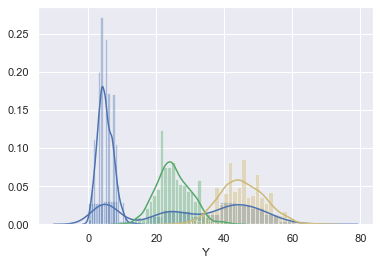

In [20]:
# visualize data set 
data = pd.DataFrame({'Y':Y,'W':W})
colors = ['b','g','y','r','p']
ax = sns.distplot(Y)
for i in range(m):
    ax = sns.distplot(data[data['W']==i]['Y'],color = colors[i%len(colors)],label='Group{}'.format(i))

In [19]:
"""
Online EM algo
"""
# Parameters
gamma_0 = 1
alpha = 1.
gamma = np.array([gamma_0 * np.power(n, -alpha) for l in range(1, n+1)])

# Initialization
p_init, l_init = poisson_random_param(m, max_l)
theta_init = np.array([p_init, l_init])
print(f"Initial Theta:\n{theta_init}")

# Online EM algo
s, theta = online_EM(Y, theta_init, gamma, poisson_s_bar, poisson_theta_bar)
theta2 = online_EM2(Y, theta_init, gamma)
# Output
print("\n===============\nFinal results \n===============")
print(f"Truth:\n{theta_true}")
print(f"Online EM after {n} iterations:\n{theta}")
print(f"Online EM2 after {n} iterations:\n{theta2}")

Initial Theta:
[[5.9090294  4.52700281 4.00711689]
 [0.81504809 0.03069587 0.15425605]]
new_s = [[2.00000000e-04 4.40000000e-03]
 [1.56924734e-35 3.45234415e-34]
 [3.27055417e-20 7.19521918e-19]]
new_theta = [[2.00000000e-04 1.56924734e-35 3.27055417e-20]
 [2.20000000e+01 2.20000000e+01 2.20000000e+01]]
new_s = [[3.99960000e-04 9.59912000e-03]
 [3.13818083e-35 7.53169676e-34]
 [6.54045423e-20 1.56972210e-18]]
new_theta = [[3.99960000e-04 3.13818083e-35 6.54045423e-20]
 [2.40002000e+01 2.40002000e+01 2.40002000e+01]]
new_s = [[5.99880008e-04 1.69972002e-02]
 [4.70680053e-35 1.33364056e-33]
 [9.80970031e-20 2.77951320e-18]]
new_theta = [[5.99880008e-04 4.70680053e-35 9.80970031e-20]
 [2.83343334e+01 2.83343334e+01 2.83343334e+01]]
new_s = [[7.99760032e-04 2.51938007e-02]
 [6.27510652e-35 1.97676524e-33]
 [1.30782925e-19 4.11988450e-18]]
new_theta = [[7.99760032e-04 6.27510652e-35 1.30782925e-19]
 [3.15017002e+01 3.15017002e+01 3.15017002e+01]]
new_s = [[9.99600080e-04 3.59887620e-02]
 [7

 [2.82591461e+01 5.13993896e+01 5.13993910e+01]]
new_s = [[8.06954413e-02 2.28152889e+00]
 [1.35785173e-24 6.97891963e-23]
 [4.10108351e-03 2.10782461e-01]]
new_theta = [[8.06954413e-02 1.35785173e-24 4.10108351e-03]
 [2.82733306e+01 5.13967722e+01 5.13967736e+01]]
new_s = [[8.06933290e-02 2.28174587e+00]
 [1.41915513e-24 7.27308369e-23]
 [4.28623652e-03 2.19667019e-01]]
new_theta = [[8.06933290e-02 1.41915513e-24 4.28623652e-03]
 [2.82767597e+01 5.12493914e+01 5.12493928e+01]]
new_s = [[8.08771903e-02 2.28188952e+00]
 [1.41887130e-24 7.27162907e-23]
 [4.28537927e-03 2.19623086e-01]]
new_theta = [[8.08771903e-02 1.41887130e-24 4.28537927e-03]
 [2.82142532e+01 5.12493914e+01 5.12493928e+01]]
new_s = [[8.08622701e-02 2.28149842e+00]
 [1.48439110e-24 7.61235332e-23]
 [4.48326698e-03 2.29913890e-01]]
new_theta = [[8.08622701e-02 1.48439110e-24 4.48326698e-03]
 [2.82146224e+01 5.12826662e+01 5.12826675e+01]]
new_s = [[8.10460780e-02 2.28664157e+00]
 [1.48410071e-24 7.61084903e-23]
 [4.48238

 [2.48562987e+01 4.74023245e+01 4.74023252e+01]]
new_s = [[1.27368433e-01 3.16153656e+00]
 [1.01536768e-23 4.81307884e-22]
 [3.06668779e-02 1.45368132e+00]]
new_theta = [[1.27368433e-01 1.01536768e-23 3.06668779e-02]
 [2.48219789e+01 4.74023245e+01 4.74023252e+01]]
new_s = [[1.27542958e-01 3.16450423e+00]
 [1.01516464e-23 4.81211628e-22]
 [3.06607453e-02 1.45339060e+00]]
new_theta = [[1.27542958e-01 1.01516464e-23 3.06607453e-02]
 [2.48112814e+01 4.74023237e+01 4.74023244e+01]]
new_s = [[1.27717450e-01 3.16407133e+00]
 [1.01496161e-23 4.81115385e-22]
 [3.06546132e-02 1.45309992e+00]]
new_theta = [[1.27717450e-01 1.01496161e-23 3.06546132e-02]
 [2.47739940e+01 4.74023237e+01 4.74023244e+01]]
new_s = [[1.27691906e-01 3.16343852e+00]
 [1.02138053e-23 4.85522065e-22]
 [3.08484823e-02 1.46640930e+00]]
new_theta = [[1.27691906e-01 1.02138053e-23 3.08484823e-02]
 [2.47739940e+01 4.75358646e+01 4.75358653e+01]]
new_s = [[1.27692726e-01 3.16386018e+00]
 [1.02692545e-23 4.87724638e-22]
 [3.10159

 [2.20527057e+01 4.67659309e+01 4.67659315e+01]]
new_s = [[1.62606104e-01 3.58590456e+00]
 [2.19212366e-23 1.02571229e-21]
 [6.62081224e-02 3.09793133e+00]]
new_theta = [[1.62606104e-01 2.19212366e-23 6.62081224e-02]
 [2.20527057e+01 4.67908042e+01 4.67908048e+01]]
new_s = [[1.62573595e-01 3.58518795e+00]
 [2.19830675e-23 1.02861926e-21]
 [6.63948687e-02 3.10671118e+00]]
new_theta = [[1.62573595e-01 2.19830675e-23 6.63948687e-02]
 [2.20527075e+01 4.67914343e+01 4.67914349e+01]]
new_s = [[1.62741081e-01 3.58467091e+00]
 [2.19786709e-23 1.02841354e-21]
 [6.63815897e-02 3.10608984e+00]]
new_theta = [[1.62741081e-01 2.19786709e-23 6.63815897e-02]
 [2.20268349e+01 4.67914343e+01 4.67914349e+01]]
new_s = [[1.62907557e-01 3.58932764e+00]
 [2.19745981e-23 1.02821657e-21]
 [6.63692887e-02 3.10549495e+00]]
new_theta = [[1.62907557e-01 2.19745981e-23 6.63692887e-02]
 [2.20329106e+01 4.67911435e+01 4.67911441e+01]]
new_s = [[1.63074976e-01 3.59040978e+00]
 [2.19702032e-23 1.02801093e-21]
 [6.63560

 [9.92176531e-02 4.58159031e+00]]
new_theta = [[1.91026528e-01 3.28505565e-23 9.92176531e-02]
 [2.03418478e+01 4.61771681e+01 4.61771687e+01]]
new_s = [[1.90988336e-01 3.88505599e+00]
 [3.29102010e-23 1.51955572e-21]
 [9.93977958e-02 4.58947338e+00]]
new_theta = [[1.90988336e-01 3.29102010e-23 9.93977958e-02]
 [2.03418495e+01 4.61727877e+01 4.61727883e+01]]
new_s = [[1.90950138e-01 3.88427898e+00]
 [3.29698381e-23 1.52276143e-21]
 [9.95779162e-02 4.59915549e+00]]
new_theta = [[1.90950138e-01 3.29698381e-23 9.95779162e-02]
 [2.03418495e+01 4.61865000e+01 4.61865006e+01]]
new_s = [[1.91111948e-01 3.88510212e+00]
 [3.29632442e-23 1.52245688e-21]
 [9.95580006e-02 4.59823566e+00]]
new_theta = [[1.91111948e-01 3.29632442e-23 9.95580006e-02]
 [2.03289337e+01 4.61865000e+01 4.61865006e+01]]
new_s = [[1.91074544e-01 3.88435700e+00]
 [3.30225999e-23 1.52472437e-21]
 [9.97372712e-02 4.60508412e+00]]
new_theta = [[1.91074544e-01 3.30225999e-23 9.97372712e-02]
 [2.03290136e+01 4.61721481e+01 4.6172

 [1.30169419e-01 5.92977009e+00]]
new_theta = [[2.16219332e-01 4.30985593e-23 1.30169419e-01]
 [1.90996082e+01 4.55542480e+01 4.55542486e+01]]
new_s = [[2.16376088e-01 4.12967859e+00]
 [4.30899396e-23 1.96292979e-21]
 [1.30143386e-01 5.92858414e+00]]
new_theta = [[2.16376088e-01 4.30899396e-23 1.30143386e-01]
 [1.90856514e+01 4.55542480e+01 4.55542486e+01]]
new_s = [[2.16532813e-01 4.12965265e+00]
 [4.30813216e-23 1.96253721e-21]
 [1.30117357e-01 5.92739842e+00]]
new_theta = [[2.16532813e-01 4.30813216e-23 1.30117357e-01]
 [1.90717175e+01 4.55542480e+01 4.55542486e+01]]
new_s = [[2.16689318e-01 4.13342238e+00]
 [4.30727677e-23 1.96214614e-21]
 [1.30091522e-01 5.92621728e+00]]
new_theta = [[2.16689318e-01 4.30727677e-23 1.30091522e-01]
 [1.90753399e+01 4.55542153e+01 4.55542159e+01]]
new_s = [[2.16645980e-01 4.13259570e+00]
 [4.31303723e-23 1.96493223e-21]
 [1.30265504e-01 5.93463203e+00]]
new_theta = [[2.16645980e-01 4.31303723e-23 1.30265504e-01]
 [1.90753399e+01 4.55579704e+01 4.5557

new_s = [[2.34522824e-01 4.27448599e+00]
 [5.33982851e-23 2.42542857e-21]
 [1.61277404e-01 7.32545676e+00]]
new_theta = [[2.34522824e-01 5.33982851e-23 1.61277404e-01]
 [1.82263113e+01 4.54214694e+01 4.54214700e+01]]
new_s = [[2.34475919e-01 4.27363109e+00]
 [5.34538246e-23 2.42851932e-21]
 [1.61445148e-01 7.33479167e+00]]
new_theta = [[2.34475919e-01 5.34538246e-23 1.61445148e-01]
 [1.82263113e+01 4.54320965e+01 4.54320972e+01]]
new_s = [[2.34628979e-01 4.27697542e+00]
 [5.34431487e-23 2.42803393e-21]
 [1.61412904e-01 7.33332566e+00]]
new_theta = [[2.34628979e-01 5.34431487e-23 1.61412904e-01]
 [1.82286751e+01 4.54320897e+01 4.54320904e+01]]
new_s = [[2.34691067e-01 4.27939045e+00]
 [5.34625852e-23 2.42845207e-21]
 [1.61471608e-01 7.33458857e+00]]
new_theta = [[2.34691067e-01 5.34625852e-23 1.61471608e-01]
 [1.82341429e+01 4.54233941e+01 4.54233947e+01]]
new_s = [[2.34844129e-01 4.27913457e+00]
 [5.34518927e-23 2.42796638e-21]
 [1.61439313e-01 7.33312165e+00]]
new_theta = [[2.34844129

 [1.91838695e-01 8.66556884e+00]]
new_theta = [[2.53201109e-01 6.35170032e-23 1.91838695e-01]
 [1.73753160e+01 4.51711200e+01 4.51711206e+01]]
new_s = [[2.53350465e-01 4.40216934e+00]
 [6.35043010e-23 2.86856037e-21]
 [1.91800331e-01 8.66383580e+00]]
new_theta = [[2.53350465e-01 6.35043010e-23 1.91800331e-01]
 [1.73758092e+01 4.51711194e+01 4.51711201e+01]]
new_s = [[2.53499795e-01 4.40328890e+00]
 [6.34916002e-23 2.86798665e-21]
 [1.91761971e-01 8.66210303e+00]]
new_theta = [[2.53499795e-01 6.34916002e-23 1.91761971e-01]
 [1.73699900e+01 4.51711194e+01 4.51711201e+01]]
new_s = [[2.53649085e-01 4.40620806e+00]
 [6.34789051e-23 2.86741312e-21]
 [1.91723629e-01 8.66037079e+00]]
new_theta = [[2.53649085e-01 6.34789051e-23 1.91723629e-01]
 [1.73712752e+01 4.51711181e+01 4.51711187e+01]]
new_s = [[2.53798356e-01 4.40692682e+00]
 [6.34662093e-23 2.86683964e-21]
 [1.91685284e-01 8.65863872e+00]]
new_theta = [[2.53798356e-01 6.34662093e-23 1.91685284e-01]
 [1.73638903e+01 4.51711181e+01 4.5171

 [1.68035519e+01 4.49364464e+01 4.49364471e+01]]
new_s = [[2.68730804e-01 4.51563201e+00]
 [7.11068170e-23 3.19535810e-21]
 [2.14762005e-01 9.65085418e+00]]
new_theta = [[2.68730804e-01 7.11068170e-23 2.14762005e-01]
 [1.68035519e+01 4.49374368e+01 4.49374375e+01]]
new_s = [[2.68677058e-01 4.51472888e+00]
 [7.11588149e-23 3.19829486e-21]
 [2.14919053e-01 9.65972401e+00]]
new_theta = [[2.68677058e-01 7.11588149e-23 2.14919053e-01]
 [1.68035519e+01 4.49458703e+01 4.49458710e+01]]
new_s = [[2.68623323e-01 4.51382594e+00]
 [7.12108023e-23 3.20089994e-21]
 [2.15076069e-01 9.66759207e+00]]
new_theta = [[2.68623323e-01 7.12108023e-23 2.15076069e-01]
 [1.68035519e+01 4.49496402e+01 4.49496409e+01]]
new_s = [[2.68569598e-01 4.51292317e+00]
 [7.12627793e-23 3.20403425e-21]
 [2.15233054e-01 9.67705855e+00]]
new_theta = [[2.68569598e-01 7.12627793e-23 2.15233054e-01]
 [1.68035519e+01 4.49608377e+01 4.49608384e+01]]
new_s = [[2.68715884e-01 4.51222059e+00]
 [7.12485267e-23 3.20339345e-21]
 [2.15190

 [1.62056139e+01 4.48262269e+01 4.48262276e+01]]
new_s = [[2.82286648e-01 4.57462844e+00]
 [8.10572520e-23 3.63356850e-21]
 [2.44815035e-01 1.09743693e+01]]
new_theta = [[2.82286648e-01 8.10572520e-23 2.44815035e-01]
 [1.62056139e+01 4.48271858e+01 4.48271866e+01]]
new_s = [[2.82430191e-01 4.57451351e+00]
 [8.10410406e-23 3.63284178e-21]
 [2.44766072e-01 1.09721744e+01]]
new_theta = [[2.82430191e-01 8.10410406e-23 2.44766072e-01]
 [1.61969706e+01 4.48271858e+01 4.48271866e+01]]
new_s = [[2.82573661e-01 4.57759772e+00]
 [8.10248470e-23 3.63211551e-21]
 [2.44717164e-01 1.09699808e+01]]
new_theta = [[2.82573661e-01 8.10248470e-23 2.44717164e-01]
 [1.61996618e+01 4.48271813e+01 4.48271820e+01]]
new_s = [[2.82517147e-01 4.57668226e+00]
 [8.10748608e-23 3.63403783e-21]
 [2.44868219e-01 1.09757868e+01]]
new_theta = [[2.82517147e-01 8.10748608e-23 2.44868219e-01]
 [1.61996619e+01 4.48232386e+01 4.48232394e+01]]
new_s = [[2.82460644e-01 4.57576692e+00]
 [8.11248650e-23 3.63662199e-21]
 [2.45019

 [1.57582953e+01 4.45251290e+01 4.45251298e+01]]
new_s = [[2.97467549e-01 4.68758149e+00]
 [8.90497143e-23 3.96557743e-21]
 [2.68954453e-01 1.19771269e+01]]
new_theta = [[2.97467549e-01 8.90497143e-23 2.68954453e-01]
 [1.57582953e+01 4.45321747e+01 4.45321755e+01]]
new_s = [[2.97408055e-01 4.68664397e+00]
 [8.90981235e-23 3.96789662e-21]
 [2.69100662e-01 1.19841315e+01]]
new_theta = [[2.97408055e-01 8.90981235e-23 2.69100662e-01]
 [1.57582953e+01 4.45340088e+01 4.45340096e+01]]
new_s = [[2.97348574e-01 4.68570664e+00]
 [8.91465231e-23 3.97067888e-21]
 [2.69246842e-01 1.19925346e+01]]
new_theta = [[2.97348574e-01 8.91465231e-23 2.69246842e-01]
 [1.57582953e+01 4.45410403e+01 4.45410411e+01]]
new_s = [[2.97289104e-01 4.68476950e+00]
 [8.91949129e-23 3.97286460e-21]
 [2.69392992e-01 1.19991361e+01]]
new_theta = [[2.97289104e-01 8.91949129e-23 2.69392992e-01]
 [1.57582954e+01 4.45413810e+01 4.45413818e+01]]
new_s = [[2.97229646e-01 4.68383255e+00]
 [8.92432931e-23 3.97564587e-21]
 [2.69539

 [2.92111103e-01 1.29329463e+01]]
new_theta = [[3.07889257e-01 9.67167867e-23 2.92111103e-01]
 [1.53565477e+01 4.42740651e+01 4.42740659e+01]]
new_s = [[3.07827679e-01 4.72717044e+00]
 [9.67636625e-23 4.28410254e-21]
 [2.92252681e-01 1.29391597e+01]]
new_theta = [[3.07827679e-01 9.67636625e-23 2.92252681e-01]
 [1.53565477e+01 4.42738775e+01 4.42738784e+01]]
new_s = [[3.07767571e-01 4.72627166e+00]
 [9.68100463e-23 4.28534929e-21]
 [2.92392773e-01 1.29429252e+01]]
new_theta = [[3.07767571e-01 9.68100463e-23 2.92392773e-01]
 [1.53566266e+01 4.42655432e+01 4.42655441e+01]]
new_s = [[3.07906018e-01 4.72692640e+00]
 [9.67906843e-23 4.28449222e-21]
 [2.92334294e-01 1.29403366e+01]]
new_theta = [[3.07906018e-01 9.67906843e-23 2.92334294e-01]
 [1.53518481e+01 4.42655432e+01 4.42655441e+01]]
new_s = [[3.07844436e-01 4.72598102e+00]
 [9.68375453e-23 4.28688006e-21]
 [2.92475827e-01 1.29475485e+01]]
new_theta = [[3.07844436e-01 9.68375453e-23 2.92475827e-01]
 [1.53518481e+01 4.42687807e+01 4.4268

 [3.09954992e-01 1.37168331e+01]]
new_theta = [[3.17165017e-01 1.02624825e-22 3.09954992e-01]
 [1.49899544e+01 4.42542731e+01 4.42542740e+01]]
new_s = [[3.17101585e-01 4.75333828e+00]
 [1.02670519e-22 4.54345992e-21]
 [3.10093001e-01 1.37224898e+01]]
new_theta = [[3.17101585e-01 1.02670519e-22 3.10093001e-01]
 [1.49899544e+01 4.42528191e+01 4.42528200e+01]]
new_s = [[3.17038164e-01 4.75238761e+00]
 [1.02716204e-22 4.54599462e-21]
 [3.10230983e-01 1.37301453e+01]]
new_theta = [[3.17038164e-01 1.02716204e-22 3.10230983e-01]
 [1.49899544e+01 4.42578136e+01 4.42578145e+01]]
new_s = [[3.16974757e-01 4.75143714e+00]
 [1.02761880e-22 4.54852882e-21]
 [3.10368936e-01 1.37377993e+01]]
new_theta = [[3.16974757e-01 1.02761880e-22 3.10368936e-01]
 [1.49899544e+01 4.42628026e+01 4.42628035e+01]]
new_s = [[3.16911362e-01 4.75048685e+00]
 [1.02807547e-22 4.55073142e-21]
 [3.10506863e-01 1.37444517e+01]]
new_theta = [[3.16911362e-01 1.02807547e-22 3.10506863e-01]
 [1.49899544e+01 4.42645657e+01 4.4264